<img src="norm_test_1.png">

Firstly, make sure you passed Normal Distribution and know about the common details of the Distribution!

So, Normality tests are basically different types of methods which checks if the collection of samples are Normally Distributed or form a Normal Distribution. 

Methods of Normality test are divided into two types such as Visual and Statistical. <br>
Visual way of checking for Normality is by plotting Histogram or Quantile-Quantile plots

Histogram is a plot that shows the bins which contains observations(or sample) across x-axis and frequency of those observations(samples) is placed on y-axis. A sample of data has a Normal Distribution if it is shaped like a BELL.

<br>Example: I will generate random variables of different distributions and plot their histogram

In [0]:
#Importing the libraries first
import numpy as np
import scipy.stats as st
from matplotlib import pyplot as plt

#Seed is used here to manage random variables
np.random.seed(1)

#Creating random variables of distributions with Random in Numpy
first_dist = np.random.gamma(0.5, size=400) #Gamma Distribution
second_dist = np.random.normal(size=400) #Normal Distribution
third_dist = np.random.exponential(size = 400) #Exponential Distribution

#Creating random variables of distributions with RVS function of Scipy.stats
fourth_dist = st.chi2.rvs(2, size=400) #Chi Squared Distribution
fifth_dist = st.beta.rvs(1, 3, size=400) #Beta Distribution
sixth_dist = st.uniform.rvs(size=400) #Uniform Distribution

I will create a figure which will contain 6 plots of different probability distributions<br>
First example is done by using FOR loop<br>

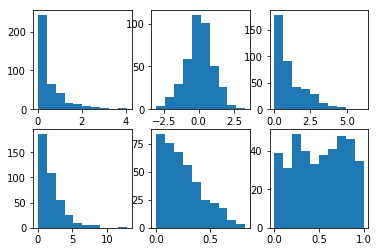

In [0]:
dists = [first_dist, second_dist, third_dist, fourth_dist, fifth_dist, sixth_dist]
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.hist(dists[i-1])

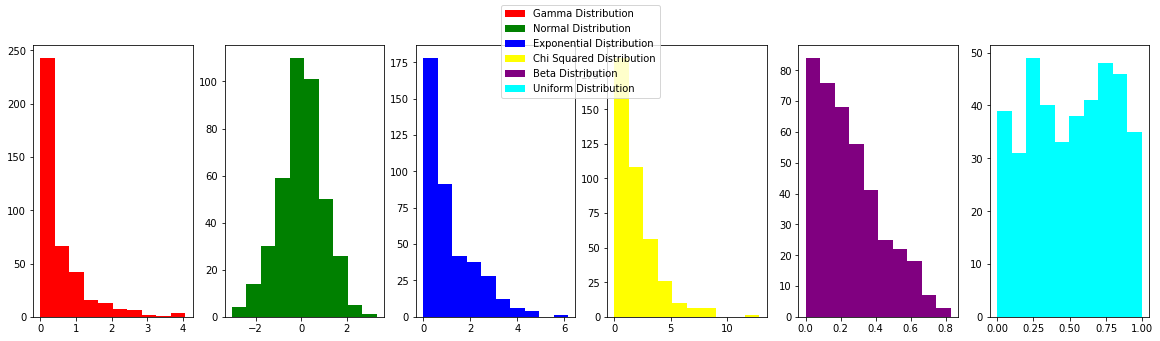

In [0]:
fig, [ax1, ax2, ax3, ax4, ax5, ax6] = plt.subplots(nrows=1, ncols=6, figsize=(20, 5))


ax1.hist(first_dist, label='Gamma Distribution', color="red")
ax2.hist(second_dist, label='Normal Distribution', color="green")
ax3.hist(third_dist, label='Exponential Distribution', color="blue")
ax4.hist(fourth_dist, label='Chi Squared Distribution', color="yellow")
ax5.hist(fifth_dist, label='Beta Distribution', color="purple")
ax6.hist(sixth_dist, label='Uniform Distribution', color="cyan")
fig.legend(loc=9)

We can see visually that second plot(green) looks more like Normal distribution<br>
This is a simple way of Normality test, which is by plotting Histogram and visually detecting whether it is Normally distributed or not.

The other Visual way of Normality test is <b>Quantile-Quantile plot<br></b>
Quantile-Quantile which is also called QQ plot. Watch the video below about QQ plot in order to get the concept of it

In [0]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/X9_ISJ0YpGw" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

Now, let's try to check which of our collection of samples is Normally distributed

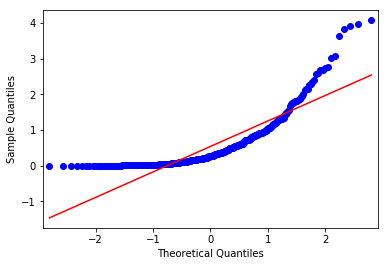

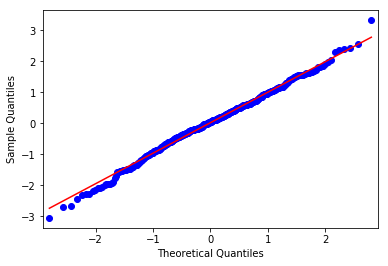

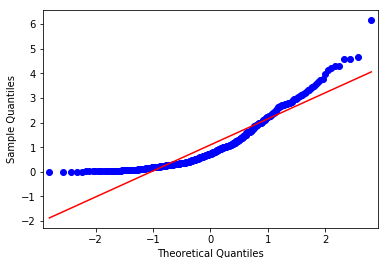

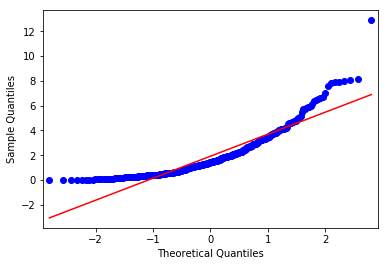

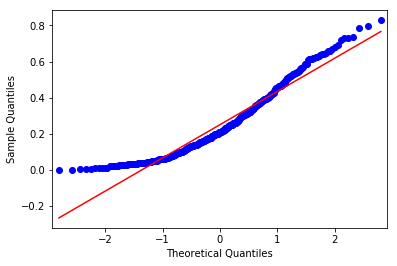

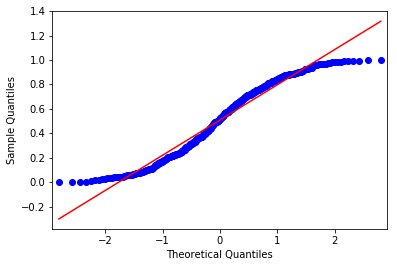

In [0]:
from statsmodels.graphics.gofplots import qqplot

# q-q plot of datasets
dists = [first_dist, second_dist, third_dist, fourth_dist, fifth_dist, sixth_dist]

for i in dists:
    qqplot(i, line='s')
plt.show()



As we can see, second graph is much closer to Normal distribution than others because most points are on the line

## Statistical tests for Normality

There are many statistical ways for Normality test, but we will practice only 2 of them and they are:
<br>Shapiro-Wilk Test
<br>D’Agostino’s K^2 Test

Before jumping into those tests, you need to understand some terms such as:
<br>Statistic: a quantity calculated by the test 
<br>p-value: a value used to determine whether test is accepted or rejected

Alpha is usually either 1% or 5%, depending on type of data and personal preference. However, 5% is good enough for our Normality test

Dataset follows Normal Distribution only when p-value is larger than the Alpha(0.05)

### Shapiro-Wilk Test

Shapiro-Wilk Test evaluates a data sample and how likely it is that the data is Normally distributed. <br>
This test is considered as reliable, but there are some suggestions that test is suitable for small datasets, 1000 or fewer observation

Now, let's see how it Shapiro-Wilk Test implemented with Scipy package

```Python
from scipy.stats import shapiro
stat, p = shapiro(data)
```

Let's apply Shapiro-Wilk method to our first dataset

In [0]:
from scipy.stats import shapiro
stat, p = shapiro(first_dist)
'{:.50f}'.format(p) #avoiding constant 3, just in order to show that the value is below 0.05

'0.00000000000000000000000040237398610324203370693336'

In [0]:
p

4.0237398610324203e-25

the p-value above is surely below 0.05(alpha), thus we can say that dataset does not follow Normal Distribution 

As we have 6 different datasets, I will apply shapiro-wilk test to all of them with FOR loop and print the result

In [0]:
from scipy.stats import shapiro

#initializing alpha to be 5%
alpha = 0.05

#storing all the data samples in a single list in order to iterate through them
dists = [first_dist, second_dist, third_dist, fourth_dist, fifth_dist, sixth_dist]

#iterating through all data samples
for i in dists:
    stat, p = shapiro(i)

    if p > alpha:
        print('The Sample is Normally Distributed')
    else:
        print('The Sample does not follow Normal Distribution')

The Sample does not follow Normal Distribution
The Sample is Normally Distributed
The Sample does not follow Normal Distribution
The Sample does not follow Normal Distribution
The Sample does not follow Normal Distribution
The Sample does not follow Normal Distribution


As we can see, only second dataset follows Normal Distribution

### D’Agostino’s K^2 Test

The D’Agostino’s K^2 test calculates summary statistics of the data, namely kurtosis and skewness, to determine if the data distribution is from the normal distribution.

The D’Agostino’s K^2 test is available via the normaltest() SciPy function and returns the test statistic and the p-value.

```Python
from scipy.stats import normaltest
stat, p = normaltest(data)
```

I will leave a video that explains what Skewness and Kurtosis are. You can skip the video if you know those.

In [0]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/HnMGKsupF8Q" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [0]:
from scipy.stats import normaltest

alpha = 0.05

for i in dists:
    stat, p = normaltest(i)

    if p > alpha:
        print('The Sample is Normally Distributed')
    else:
        print('The Sample does not follow Normal Distribution')

The Sample does not follow Normal Distribution
The Sample is Normally Distributed
The Sample does not follow Normal Distribution
The Sample does not follow Normal Distribution
The Sample does not follow Normal Distribution
The Sample does not follow Normal Distribution


Let's apply what we have learnt to the real data!

In [0]:
import pandas as pd
data = pd.read_csv("car_pred.csv")

In [0]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


This dataset is about the cars' features such as Model, Make and etc. <br>
MSRP is a price column which will undergo Normality test

In [0]:
car_price = data['MSRP']
car_price.describe()

count    1.191400e+04
mean     4.059474e+04
std      6.010910e+04
min      2.000000e+03
25%      2.100000e+04
50%      2.999500e+04
75%      4.223125e+04
max      2.065902e+06
Name: MSRP, dtype: float64

We need to clean the column before checking for normality.

First of all: Checking if there is any empty values 

In [0]:
car_price.isnull().any()

False

I made sure that there are no null values in the dataset and type of data is Float

So far, we have discussed 4 methods of Normality tests. I will be applying each method for the Price of cars and start with statistical methods

<b>Shapiro-Wilk Test

In [0]:
stats, p = shapiro(car_price)
p

C:\Users\Umerenter123\conda3\lib\site-packages\scipy\stats\morestats.py:1653: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


0.0

In [0]:
car_price.count()

11914

I could not apply shapiro-wilk test because we have almost 12k samples and shapiro-wilk test is applicable for under 5k samples

<b>D’Agostino’s K^2 Test

In [0]:
stats, p = normaltest(car_price)

alpha = 0.05
if p > alpha:
    print('The Sample is Normally Distributed')
else:
    print('The Sample does not follow Normal Distribution')

The Sample does not follow Normal Distribution


Statistical methods revealed that our data does not follow Normal Distribution, however we can still check with Graphical methods to reconfirm it

<b>QQ plot

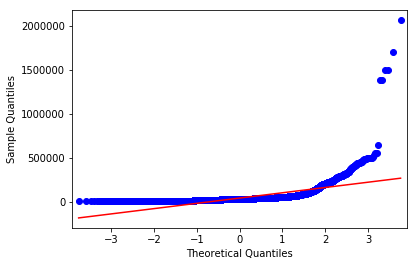

In [0]:
qqplot(car_price, line='s')
plt.show()

<b>Histogram

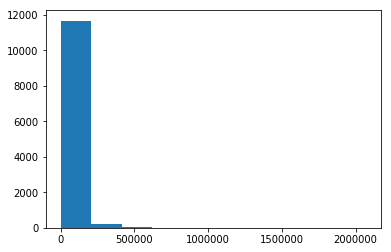

In [0]:
import matplotlib.pyplot as plt

plt.hist(car_price)
plt.show()

Conclusion: Car_prices is not Normally Distributed according to all the test results
There are ways to make the dataset follow Normal Distribution and those methods will be explained in the next Notebook